In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn import tree

In [45]:
wine = load_wine()

In [46]:
print(wine['DESCR'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [47]:
for key,value in wine.items():
    print(key,'\n',value,'\n')

data 
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] 

target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

target_names 
 ['class_0' 'class_1' 'class_2'] 

DESCR 
 Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numer

In [48]:
print('data.shape\t',wine['data'].shape,
      '\ntarget.shape \t',wine['target'].shape)

data.shape	 (178, 13) 
target.shape 	 (178,)


Split the wine data between training data and test data
We will have 118 rows in the training data
We will have 60 rows in the test data

In [49]:
wine_test = [0,60,118]

Training Data

In [50]:
wine_train_target = np.delete(wine.target, wine_test)
wine_train_data = np.delete(wine.data, wine_test, axis=0)

Test Data

In [51]:
wine_test_target = wine.target[wine_test]
wine_test_data = wine.data[wine_test]

In [52]:
model = tree.DecisionTreeClassifier()
model.fit(wine_train_data, wine_train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
print(wine_test_target)
print(model.predict(wine_test_data))
model.score(wine_train_data, wine_train_target)

[0 1 1]
[0 1 2]


1.0

In [56]:
from sklearn.externals.six import StringIO
import pydotplus

In [57]:
from io import StringIO 

In [58]:
dot_data = StringIO()
tree.export_graphviz(model, 
                    out_file=dot_data,
                    feature_names=wine.feature_names,
                    class_names=wine.target_names,
                    filled=True, rounded=True,
                    impurity=False)

In [59]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [60]:
graph.write_pdf("wine.pdf")

True

In [61]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg

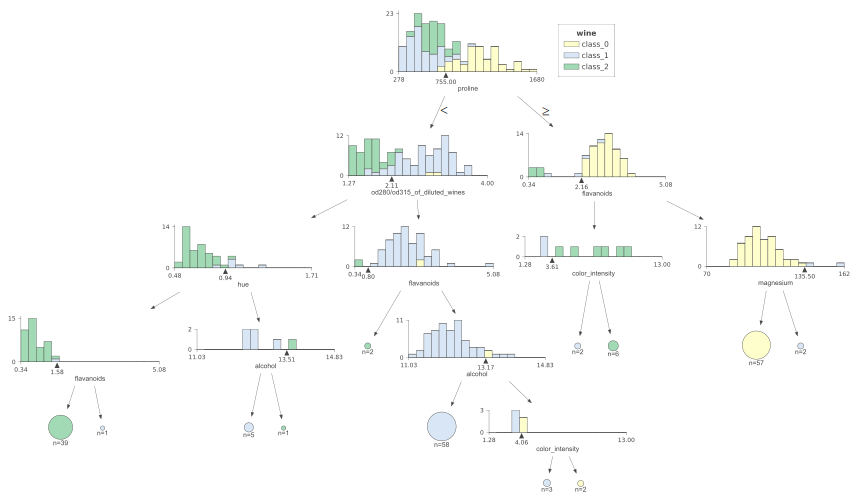

In [62]:
clas = tree.DecisionTreeClassifier(max_depth=5)  
wine = load_wine()

X_train = wine.data
y_train = wine.target
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='wine',
               feature_names=wine.feature_names, 
               class_names=list(wine.target_names), 
               histtype= 'barstacked')  # barstackes is default
viz.save("wine.svg")
viz